In [1]:
import cv2
import os
import matplotlib.pyplot  as plt
# requirement: pip install --user mediapipe
import mediapipe as mp

In [2]:
path = 'C:/Users/agasc/Desktop/29/29/14.08.24-15.08.24'
image_files = os.listdir(path)[:10]
print (image_files)

['HM20240814213403.jpeg', 'HM20240814213507.jpeg', 'HM20240814213609.jpeg', 'HM20240814213710.jpeg', 'HM20240814213814.jpeg', 'HM20240814213916.jpeg', 'HM20240814214018.jpeg', 'HM20240814214120.jpeg', 'HM20240814214221.jpeg', 'HM20240814214323.jpeg']


In [3]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,  # Process static images
    model_complexity=2,      # Use the most accurate model
    enable_segmentation=False,  # Disable segmentation
    min_detection_confidence=0.2  # Lower confidence threshold for more detections
)
mp_drawing = mp.solutions.drawing_utils

No landmarks detected in HM20240814213403.jpeg
No landmarks detected in HM20240814213507.jpeg
No landmarks detected in HM20240814213609.jpeg
Landmarks detected in HM20240814213710.jpeg
No landmarks detected in HM20240814213814.jpeg
No landmarks detected in HM20240814213916.jpeg
No landmarks detected in HM20240814214018.jpeg
Landmarks detected in HM20240814214120.jpeg
Landmarks detected in HM20240814214221.jpeg
Landmarks detected in HM20240814214323.jpeg


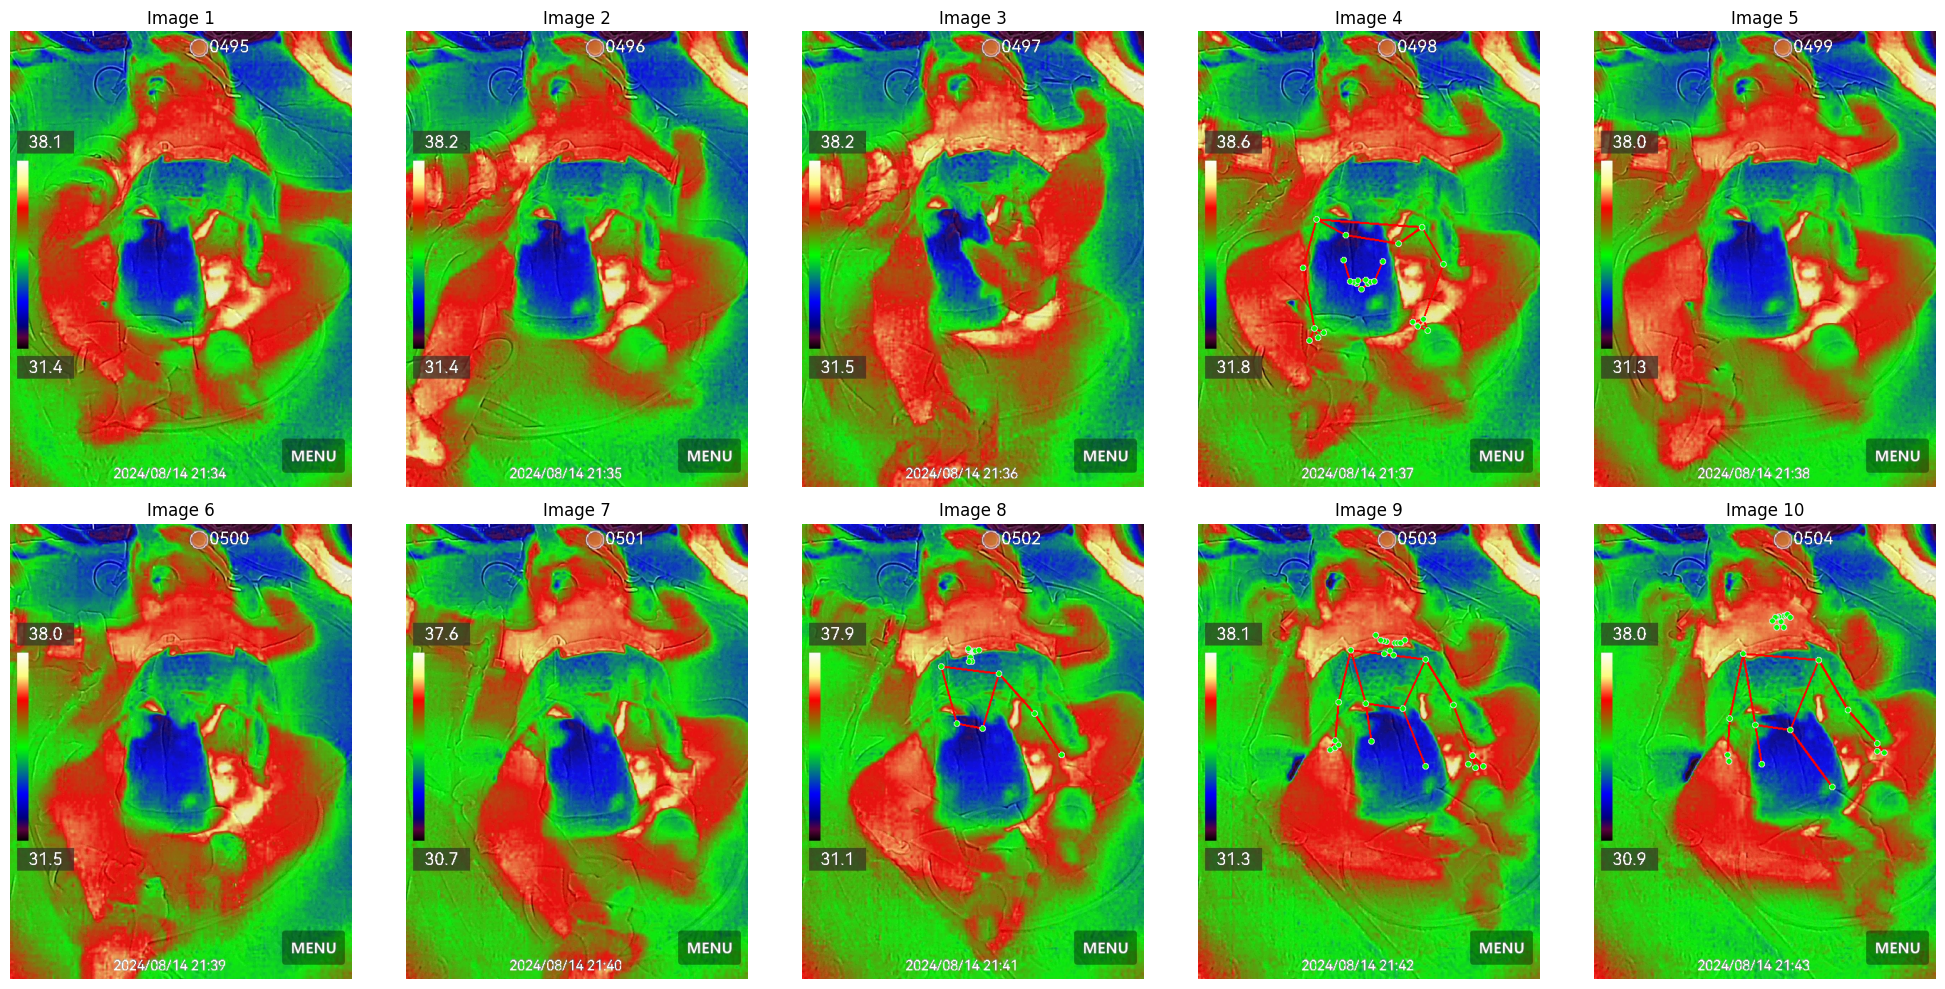

In [4]:
# Create a figure to display the images
plt.figure(figsize=(20, 10))

# Process each image
for i, img_name in enumerate(image_files):
    image_path = os.path.join(path, img_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Process the image
    results = pose.process(image_rgb)
    annotated_image = image_rgb.copy()

    # Draw the pose skeleton on the image
    if results.pose_landmarks:
        print(f"Landmarks detected in {img_name}")
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Landmark color (green)
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Connection color (blue)
        )
    else:
        print(f"No landmarks detected in {img_name}")
    # Display the processed image
    plt.subplot(2, 5, i + 1)  # Arrange in a 2-row, 5-column grid
    plt.imshow(annotated_image)  # Pass the processed image to `plt.imshow()`
    plt.axis("off")
    plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()

In [5]:
for idx, landmark in enumerate(results.pose_landmarks.landmark):
            # Get the landmark name from the PoseLandmark enum
            landmark_name = mp_pose.PoseLandmark(idx).name
            print(f"Landmark {idx} ({landmark_name}): x={landmark.x}, y={landmark.y}, z={landmark.z}, visibility={landmark.visibility}")

Landmark 0 (NOSE): x=0.5463820695877075, y=0.2170518934726715, z=-0.4988073706626892, visibility=0.999872088432312
Landmark 1 (LEFT_EYE_INNER): x=0.5559722185134888, y=0.2031962126493454, z=-0.48517906665802, visibility=0.9996843338012695
Landmark 2 (LEFT_EYE): x=0.5612522959709167, y=0.20197920501232147, z=-0.48552030324935913, visibility=0.9995866417884827
Landmark 3 (LEFT_EYE_OUTER): x=0.5666281580924988, y=0.20117565989494324, z=-0.4856559932231903, visibility=0.9997872710227966
Landmark 4 (RIGHT_EYE_INNER): x=0.5401560664176941, y=0.20581379532814026, z=-0.48963695764541626, visibility=0.9998652935028076
Landmark 5 (RIGHT_EYE): x=0.5347701907157898, y=0.20687434077262878, z=-0.49009209871292114, visibility=0.9998586177825928
Landmark 6 (RIGHT_EYE_OUTER): x=0.5292253494262695, y=0.20777180790901184, z=-0.4903329610824585, visibility=0.9999184608459473
Landmark 7 (LEFT_EAR): x=0.574388861656189, y=0.2062728852033615, z=-0.3774350583553314, visibility=0.9998739957809448
Landmark 8 (R